# Array API Comparison

Notebook dependencies and initial setup...

In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adjust the default figure size:
plt.rcParams["figure.figsize"] = (20,10)

Find the root project directory...

In [3]:
# Determine the current working directory:
dir = os.getcwd()

# Walk the parent directories looking for a `package.json` file located in the root directory...
child = ''
while (child != dir):
    spath = os.path.join(dir, 'package.json')
    if (os.path.exists(spath)):
        root_dir = dir
        break
    
    child = dir
    dir = os.path.dirname(dir)

Resolve the directory containing data files...

In [4]:
data_dir = os.path.join(root_dir, 'data')

* * *

## Overview

The following array libraries were initially analyzed:

-   [**NumPy**][numpy]: serves as the reference API against which all other array libraries are compared.
-   [**CuPy**][cupy]
-   [**Dask.array**][dask-array]
-   [**JAX**][jax]
-   [**MXNet**][mxnet]
-   [**PyTorch**][pytorch]
-   [**rnumpy**][rnumpy]: an opinionated curation of NumPy APIs, serving as an exercise in evaluating what is most "essential" (i.e., the smallest set of building block functionality on which most array functionality can be built).
-   [**PyData/Sparse**][pydata-sparse]
-   [**Tensorflow**][tensorflow]

The data from this analysis can be found in the "join" dataset below.

From the initial array library list, the following array libraries were subsequently analyzed in order to determine relatively common APIs:

-   [**NumPy**][numpy]
-   [**CuPy**][cupy]
-   [**Dask.array**][dask-array]
-   [**JAX**][jax]
-   [**MXNet**][mxnet]
-   [**PyTorch**][pytorch]
-   [**Tensorflow**][tensorflow]

[**PyData/Sparse**][pydata-sparse] was omitted due to insufficient and relatively nascent API coverage. [**rnumpy**][rnumpy] was omitted due to its nature as an intellectual exercise exploring what a minimal API could look like, rather than a ubiquitous library having widespread usage.

In order to understand array API usage by downstream libraries, the following downstream libraries were analyzed (for additional information, see the [Python API Record][python-api-record] tooling repository):

-   [**Dask.array**][dask-array]
-   [**Matplotlib**][matplotlib]
-   [**pandas**][pandas]
-   [**scikit-image**][scikit-image] (alias: `skimage`)
-   [**xarray**][xarray]

[cupy]: https://docs-cupy.chainer.org/en/stable/reference/comparison.html

[dask-array]: https://docs.dask.org/en/latest/array-api.html

[jax]: https://jax.readthedocs.io/en/latest/

[mxnet]: https://numpy.mxnet.io/api/deepnumpy

[numpy]: https://docs.scipy.org/doc/numpy

[pydata-sparse]: https://github.com/pydata/sparse

[pytorch]: https://pytorch.org/docs/stable/

[rnumpy]: https://github.com/Quansight-Labs/rnumpy

[tensorflow]: https://www.tensorflow.org/api_docs/python

[matplotlib]: https://matplotlib.org/

[pandas]: https://pandas.pydata.org/

[scikit-image]: https://scikit-image.org/ 

[xarray]: https://xarray.pydata.org/en/latest/

[python-api-record]: https://github.com/data-apis/python-api-record

* * *

## Datasets

This notebook contains the following datasets...

### Categories

Load a table mapping NumPy APIs to a usage "category"...

In [5]:
CATEGORIES = pandas.read_csv(os.path.join(data_dir, 'raw', 'numpy_categories.csv')).fillna(value='(other)')

Compute the number of rows, which will inform us as to the number of NumPy APIs...

In [6]:
NUM_APIS = len(CATEGORIES.index)
NUM_APIS

765

Preview table contents...

In [7]:
CATEGORIES.head()

,name,category,subcategory
0,numpy.absolute,math,special
1,numpy.add,math,arithmetic
2,numpy.all,logical,(other)
3,numpy.allclose,logical,(other)
4,numpy.amax,statistics,(other)


In the above table, the first column corresponds to the NumPy API (arranged in alphabetical order). The second column corresponds to a high-level cateogory (as inspired by categorization found in [**rnumpy**][rnumpy]). The third column corresponds to a subcategory of the respective value in the second column. The categories are as follows:

-   `binary_ops`: APIs for performing bitwise operations
-   `creation`: APIs for array creation
-   `datetime`: APIs for manipulating dates and times
-   `finance`: APIs for computing financial quantities
-   `indexing`: APIs for array indexing
-   `io`: APIs for loading and writing data
-   `linalg`: APIs for performing linear algebra operations (e.g., dot product, matrix multiplication, etc.)
-   `logical`: APIs for logical operations (e.g., element-wise comparisions)
-   `manipulation`: APIs for array manipulation (e.g., reshaping and joining arrays)
-   `math`: APIs for basic mathematical functions (e.g., element-wise elementary functions)
-   `polynomials`: APIs for evaluating polynomials
-   `random`: APIs for pseudorandom number generation
-   `sets`: APIs for performing set operations (e.g., union, intersection, complement, etc.)
-   `signal_processing`: APIs for performing signal processing (e.g., FFTs)
-   `sorting`: APIs for sorting array elements
-   `statistics`: APIs for computing statistics (e.g., reductions such as computing the mean, variance, and standard deviation)
-    `string`: APIs for operating on strings
-    `utilities`: general utilities (e.g., displaying an element's binary representation)
-   `(other)`: APIs not categorized (or subcategorized)

API categorization was manually compiled based on personal judgment and is undoubtedly imperfect.

[rnumpy]: https://github.com/Quansight-Labs/rnumpy

In [8]:
CATEGORY_NAMES = [
    '(other)',
    'binary_ops',
    'creation',
    'datetime',
    'finance',
    'indexing',
    'io',
    'linalg',
    'logical',
    'manipulation',
    'math',
    'polynomials',
    'random',
    'sets',
    'signal_processing',
    'sorting',
    'statistics',
    'string',
    'utilities'
]

Of the list of category names, we can define a subset of "core" categories (again, based on personal judgment)...

In [9]:
CORE_CATEGORY_NAMES = [
    'creation',
    'indexing',
    'linalg',
    'logical',
    'manipulation',
    'math',
    'signal_processing', # mainly because of FFT
    'sorting',
    'statistics'
]

NON_CORE_CATEGORY_NAMES = np.setdiff1d(CATEGORY_NAMES, CORE_CATEGORY_NAMES).tolist()

From the category data above, we can determine the relative composition of the NumPy API...

In [10]:
category_breakdown = CATEGORIES.groupby(by=['category', 'subcategory']).count()
category_breakdown

name
category          subcategory         
(other)           (other)           86
binary_ops        (other)            6
creation          (other)           36
                  existing_data     30
                  range              7
datetime          (other)            5
finance           (other)           10
indexing          (other)           10
                  searching          3
                  sorting            3
                  statistics         5
io                (other)            8
linalg            (other)           39
logical           (other)           40
manipulation      (other)           11
                  changing_shape    18
                  joining_arrays    14
                  moving_axes        8
                  tiling             3
math              arithmetic        21
                  complex            7
                  rounding          12
                  special           36
                  trig              19
polynomials       (other)          170
random            (other)            2
sets              (other)            5
signal_processing (other)            6
                  fft               18
                  window             5
sorting           (other)            6
statistics        (other)           37
                  counting           4
string            (other)           51
utilities         (other)           24

We can visualize the relative composition for top-level categories as follows

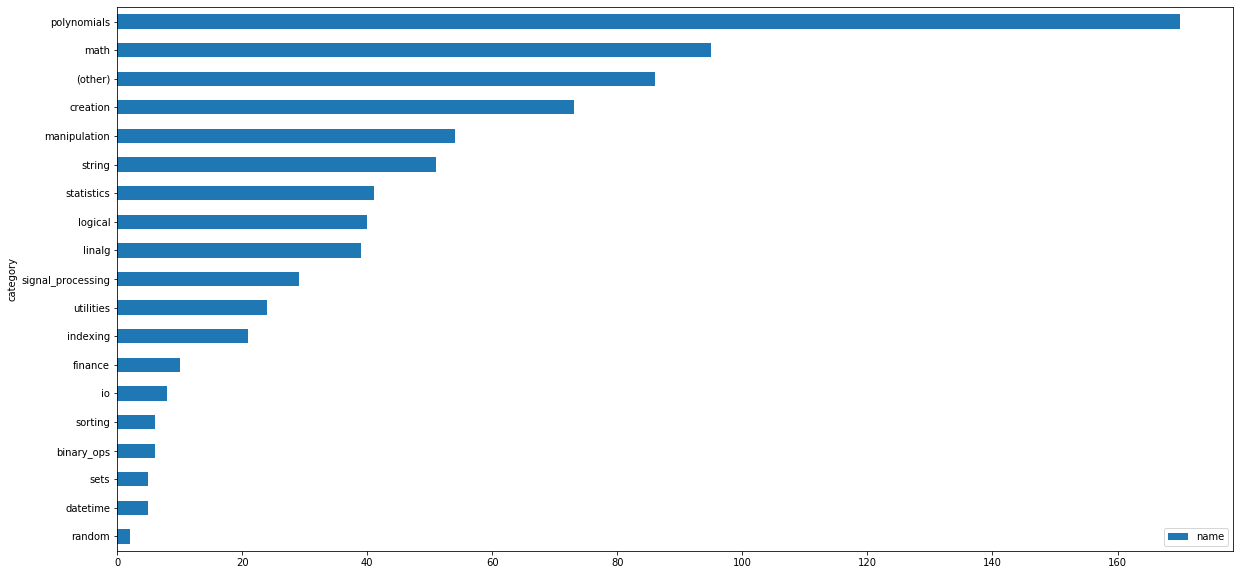

In [11]:
category_count = CATEGORIES.loc[:,['name','category']].groupby(by='category').count().sort_values(by='name', ascending=True)
category_count.plot.barh()

If we omit functions which are not in "core" categories, we arrive at the following API frequency distribution...

In [12]:
# Compute the total number of non-"core" NumPy APIs:
non_core_categories_num_apis = category_count.loc[NON_CORE_CATEGORY_NAMES,:].sum()

# Create a DataFrame containing only NumPy APIs considered "core" and compute the empirical frequency distribution:
core_category_distribution = category_count.drop(index=NON_CORE_CATEGORY_NAMES) / (NUM_APIS-non_core_categories_num_apis)
core_category_distribution.sort_values(by='name', ascending=False)

,name
category,
math,0.238693
creation,0.183417
manipulation,0.135678
statistics,0.103015
logical,0.100503
linalg,0.097990
signal_processing,0.072864
indexing,0.052764
sorting,0.015075


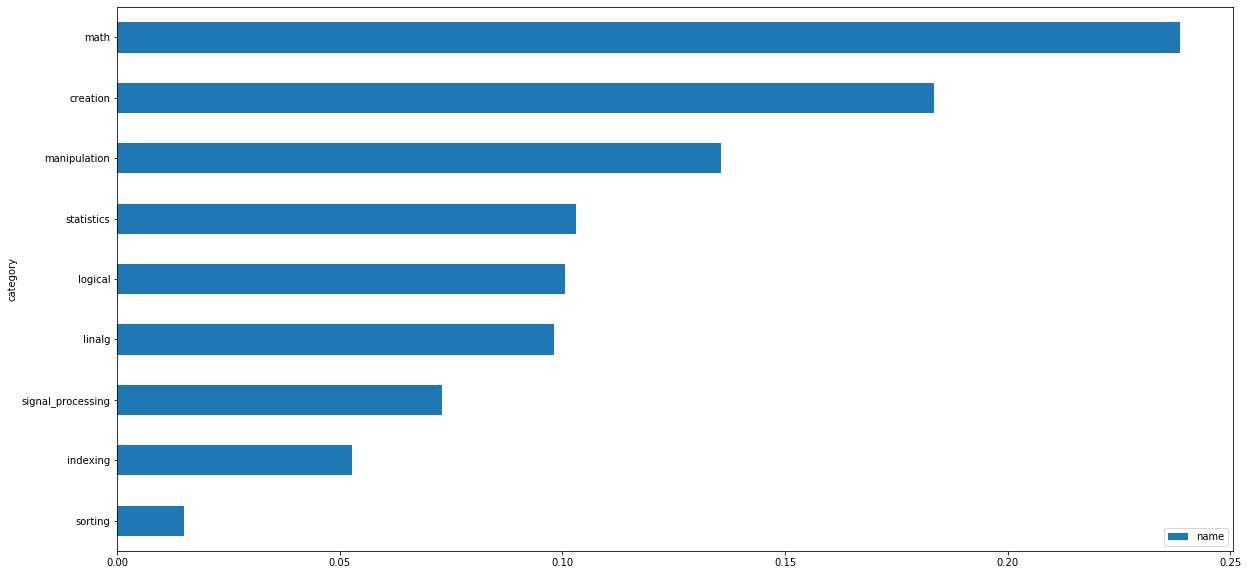

In [13]:
core_category_distribution.sort_values(by='name', ascending=True).plot.barh()

### NumPy Methods

Load a table mapping NumPy `ndarray` methods to equivalent top-level NumPy APIs...

In [14]:
METHODS_TO_FUNCTIONS = pandas.read_csv(os.path.join(data_dir, 'raw', 'numpy_methods_to_functions.csv')).fillna(value='-')

Compute the number of rows...

In [15]:
len(METHODS_TO_FUNCTIONS.index)

121

Preview table contents...

In [16]:
METHODS_TO_FUNCTIONS.head(10)

,method,function
0,numpy.ndarray,-
1,numpy.ndarray.T,numpy.transpose
2,numpy.ndarray.__abs__,numpy.absolute
3,numpy.ndarray.__add__,numpy.add
4,numpy.ndarray.__and__,numpy.bitwise_and
5,numpy.ndarray.__array__,-
6,numpy.ndarray.__array_wrap__,-
7,numpy.ndarray.__bool__,-
8,numpy.ndarray.__complex__,-
9,numpy.ndarray.__contains__,-


In [17]:
METHODS_TO_FUNCTIONS.tail(10)

,method,function
111,numpy.ndarray.swapaxes,numpy.swapaxes
112,numpy.ndarray.take,numpy.take
113,numpy.ndarray.tobytes,-
114,numpy.ndarray.tofile,numpy.save
115,numpy.ndarray.tolist,-
116,numpy.ndarray.tostring,numpy.array2string
117,numpy.ndarray.trace,numpy.trace
118,numpy.ndarray.transpose,numpy.transpose
119,numpy.ndarray.var,numpy.var
120,numpy.ndarray.view,-


### Join

Load API data for each array library as a single table, using NumPy as the reference API...

In [18]:
JOIN = pandas.read_csv(os.path.join(data_dir, 'join.csv'))

Compute the number of rows...

In [19]:
len(JOIN.index)

765

Preview table contents...

In [20]:
JOIN.head()

,numpy,cupy,dask.array,jax,mxnet,pytorch,rnumpy,sparse,tensorflow
0,numpy.absolute,absolute,NaN,absolute,absolute,abs,NaN,NaN,math.abs
1,numpy.add,add,NaN,add,add,add,add,NaN,math.add
2,numpy.all,all,all,alltrue,NaN,NaN,all,NaN,reduce_all
3,numpy.allclose,allclose,allclose,allclose,NaN,allclose,allclose,NaN,NaN
4,numpy.amax,max,max,max,amax,NaN,NaN,NaN,math.reduce_max


In the table above, the first column corresponds to the NumPy API (arranged in alphabetical order) and each subsequent column corresponds to an equivalent API in a respective array library. If an array library does not have an equivalent API, the row value for that array library is `NaN`.

### Intersection

Load a table containing the API intersection (i.e., APIs implemented in **all** compared array libraries)...

In [21]:
INTERSECTION = pandas.read_csv(os.path.join(data_dir, 'intersection.csv'))

Compute the number of rows...

In [22]:
len(INTERSECTION.index)

65

Preview table contents...

In [23]:
INTERSECTION.head()

,numpy,cupy,dask.array,jax,mxnet,pytorch,tensorflow
0,numpy.angle,angle,angle,angle,angle,angle,math.angle
1,numpy.arange,arange,arange,arange,arange,range,range
2,numpy.arccos,arccos,arccos,arccos,arccos,acos,math.acos
3,numpy.arcsin,arcsin,arcsin,arcsin,arcsin,asin,math.asin
4,numpy.arctan,arctan,arctan,arctan,arctan,atan,math.atan


In the table above, the first column corresponds to the NumPy API (arranged in alphabetical order) and each subsequent column corresponds to an equivalent API in a respective array library.

Using the API categorization data above, we can associate each NumPy API in the intersection with its respective category...

In [24]:
intersection_categories = pandas.merge(
    INTERSECTION[['numpy']],
    CATEGORIES[['name', 'category', 'subcategory']],
    left_on='numpy',
    right_on='name',
    how='left'
)
intersection_categories.drop('numpy', axis=1, inplace=True)
intersection_categories.head()

,name,category,subcategory
0,numpy.angle,math,complex
1,numpy.arange,creation,range
2,numpy.arccos,math,trig
3,numpy.arcsin,math,trig
4,numpy.arctan,math,trig


From the previous table, we can compute the category composition of the intersection, which is as follows:

In [25]:
intersection_category_count = intersection_categories.loc[:,['name', 'category']].fillna(value='(other)').groupby(by='category').count().sort_values(by='name', ascending=False)
intersection_category_count

,name
category,
math,30
linalg,11
creation,10
manipulation,6
statistics,5
indexing,3


From which we can compute the empirical distribution...

In [26]:
intersection_category_distribution = intersection_category_count / intersection_category_count.sum()
intersection_category_distribution

,name
category,
math,0.461538
linalg,0.169231
creation,0.153846
manipulation,0.092308
statistics,0.076923
indexing,0.046154


whereby

-  `~50%` are basic element-wise mathematical functions, such as arithmetic and trigonometric functions
-  `~25%` are array creation and manipulation functions
-  `~15%` are linear algebra functions
-  `~10%` are indexing and statistics

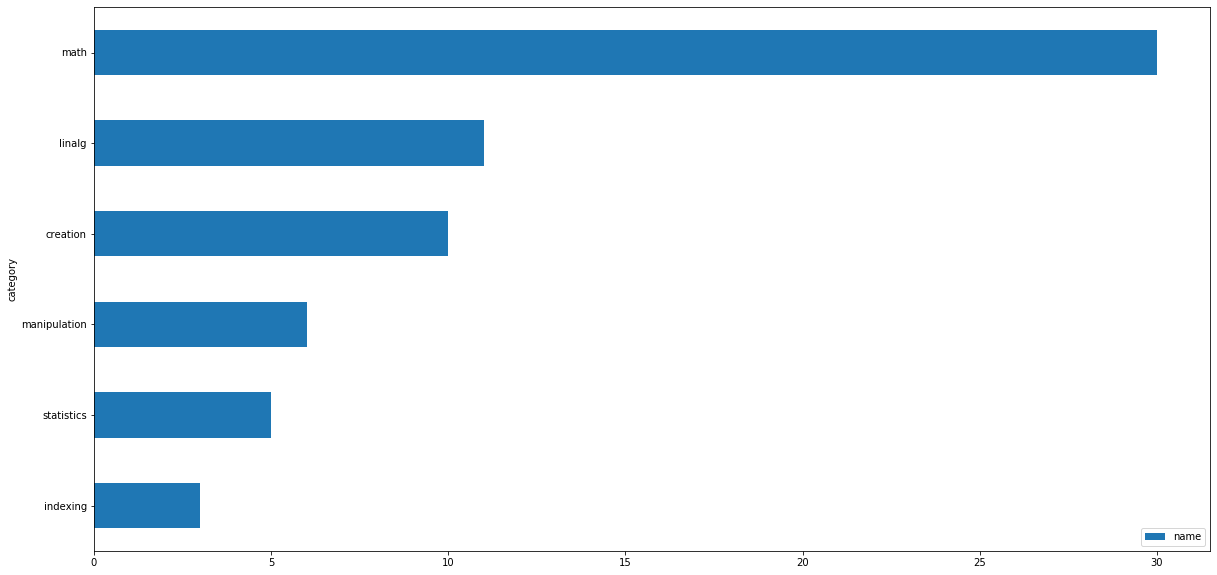

In [27]:
intersection_category_count.sort_values(by='name', ascending=True).plot.barh()

#### Summary

Array libraries find the most agreement in providing APIs for (1) array creation and manipulation, (2) element-wise operations for evaluating elementary mathematical functions, (3) basic summary statistics, and (4) linear algebra operations.

### Complement (intersection)

Load a table containing the API complement (i.e., APIs **not** included in the intersection above)...

In [28]:
COMPLEMENT = pandas.read_csv(os.path.join(data_dir, 'complement.csv'))

Compute the number of rows...

In [29]:
len(COMPLEMENT.index)

700

Preview table contents...

In [30]:
COMPLEMENT.head()

,numpy,cupy,dask.array,jax,mxnet,pytorch,tensorflow
0,numpy.absolute,absolute,NaN,absolute,absolute,abs,math.abs
1,numpy.add,add,NaN,add,add,add,math.add
2,numpy.all,all,all,alltrue,NaN,NaN,reduce_all
3,numpy.allclose,allclose,allclose,allclose,NaN,allclose,NaN
4,numpy.amax,max,max,max,amax,NaN,math.reduce_max


In the table above, the first column corresponds to the NumPy API (arranged in alphabetical order) and each subsequent column corresponds to an equivalent API in a respective array library. If an array library does not have an equivalent API, the row value for that array library is `NaN`.

Using the API categorization data above, we can associate each NumPy API in the complement with its respective category...

In [31]:
complement_categories = pandas.merge(
    COMPLEMENT[['numpy']],
    CATEGORIES[['name', 'category', 'subcategory']],
    left_on='numpy',
    right_on='name',
    how='left'
)
complement_categories.drop('numpy', axis=1, inplace=True)
complement_categories.head()

,name,category,subcategory
0,numpy.absolute,math,special
1,numpy.add,math,arithmetic
2,numpy.all,logical,(other)
3,numpy.allclose,logical,(other)
4,numpy.amax,statistics,(other)


### Common APIs

Load a table containing (relatively) common APIs (where "common" is defined as existing in **at least** `5` of the `7` compared array libraries; this dataset may be considered a weaker and more inclusive intersection)...

In [32]:
COMMON_APIS = pandas.read_csv(os.path.join(data_dir, 'common_apis.csv'))

Compute the number of rows...

In [33]:
len(COMMON_APIS.index)

195

Preview table contents...

In [34]:
COMMON_APIS.head()

,numpy,cupy,dask.array,jax,mxnet,pytorch,tensorflow
0,numpy.absolute,absolute,NaN,absolute,absolute,abs,math.abs
1,numpy.add,add,NaN,add,add,add,math.add
2,numpy.all,all,all,alltrue,NaN,NaN,reduce_all
3,numpy.allclose,allclose,allclose,allclose,NaN,allclose,NaN
4,numpy.amax,max,max,max,amax,NaN,math.reduce_max


In the table above, the first column corresponds to the NumPy API (arranged in alphabetical order) and each subsequent column corresponds to an equivalent API in a respective array library. If an array library does not have an equivalent API, the row value for that array library is `NaN`.

Using the API categorization data above, we can associate each NumPy API in the list of common APIs with its respective category...

In [35]:
common_apis_categories = pandas.merge(
    COMMON_APIS[['numpy']],
    CATEGORIES[['name', 'category', 'subcategory']],
    left_on='numpy',
    right_on='name',
    how='left'
)
common_apis_categories.drop('numpy', axis=1, inplace=True)
common_apis_categories.head()

,name,category,subcategory
0,numpy.absolute,math,special
1,numpy.add,math,arithmetic
2,numpy.all,logical,(other)
3,numpy.allclose,logical,(other)
4,numpy.amax,statistics,(other)


From the previous table, we can compute the category composition of the list of common APIs, which is as follows:

In [36]:
common_apis_category_count = common_apis_categories.loc[:,['name', 'category']].fillna(value='(other)').groupby(by='category').count().sort_values(by='name', ascending=False)
common_apis_category_count

,name
category,
math,67
linalg,23
manipulation,22
creation,19
logical,18
statistics,16
signal_processing,14
indexing,7
binary_ops,3


From which we can compute the empirical distribution...

In [37]:
common_apis_category_distribution = common_apis_category_count / common_apis_category_count.sum()
common_apis_category_distribution

,name
category,
math,0.343590
linalg,0.117949
manipulation,0.112821
creation,0.097436
logical,0.092308
statistics,0.082051
signal_processing,0.071795
indexing,0.035897
binary_ops,0.015385


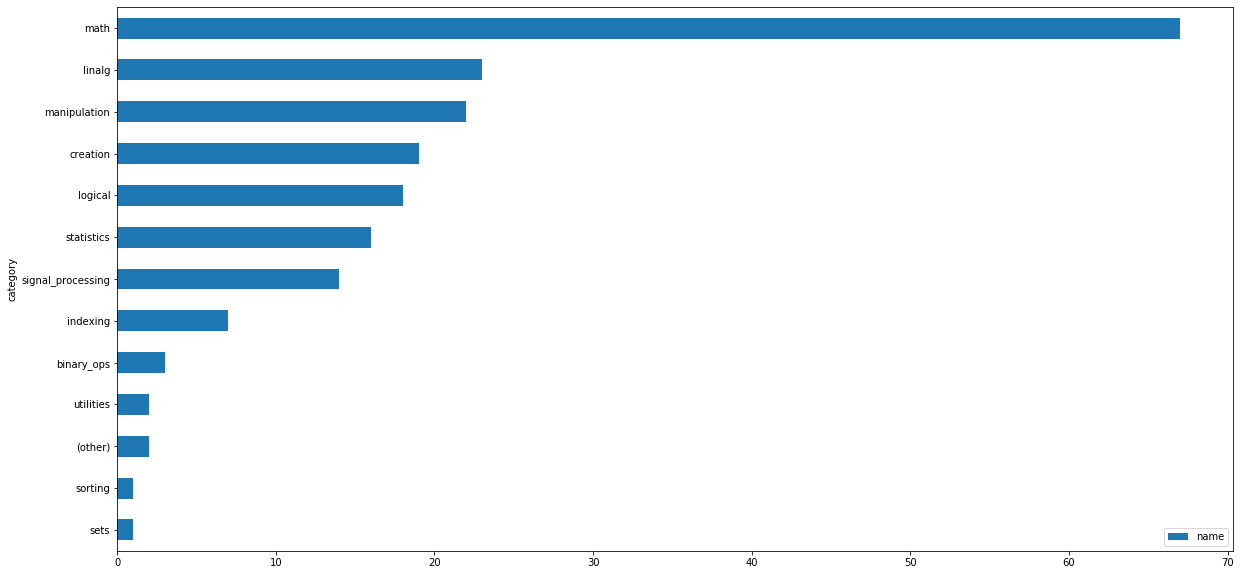

In [38]:
common_apis_category_count.sort_values(by='name', ascending=True).plot.barh()

#### Summary

In addition to the categories discussed above in the `Intersection` section, array libraries find general agreement in providing APIs for (1) logical operations, (2) signal processing, and (3) indexing.

### Complement (common APIs)

Load a table containing the complement of the above common APIs...

In [39]:
COMMON_COMPLEMENT = pandas.read_csv(os.path.join(data_dir, 'common_complement.csv'))

Compute the number of rows...

In [40]:
len(COMMON_COMPLEMENT)

571

Preview table contents...

In [41]:
COMMON_COMPLEMENT.head()

,numpy,cupy,dask.array,jax,mxnet,pytorch,tensorflow
0,numpy.append,NaN,NaN,append,append,NaN,NaN
1,numpy.apply_along_axis,NaN,apply_along_axis,NaN,NaN,NaN,NaN
2,numpy.apply_over_axes,NaN,apply_over_axes,NaN,NaN,NaN,NaN
3,numpy.argpartition,argpartition,NaN,NaN,argpartition,NaN,NaN
4,numpy.argwhere,NaN,argwhere,NaN,argwhere,NaN,NaN


In the table above, the first column corresponds to the NumPy API (arranged in alphabetical order) and each subsequent column corresponds to an equivalent API in a respective array library. If an array library does not have an equivalent API, the row value for that array library is `NaN`.

Using the API categorization data above, we can associate each NumPy API in the complement with its respective category...

In [42]:
common_complement_categories = pandas.merge(
    COMMON_COMPLEMENT[['numpy']],
    CATEGORIES[['name', 'category', 'subcategory']],
    left_on='numpy',
    right_on='name',
    how='left'
)
common_complement_categories.drop('numpy', axis=1, inplace=True)
common_complement_categories.head()

,name,category,subcategory
0,numpy.append,manipulation,(other)
1,numpy.apply_along_axis,utilities,(other)
2,numpy.apply_over_axes,utilities,(other)
3,numpy.argpartition,indexing,sorting
4,numpy.argwhere,indexing,searching


### Downstream Library Usage

Downstream library usage was measured by running test suites for each respective downstream library and recording NumPy API calls. For further details, see the API record tooling [repository](https://github.com/data-apis/python-api-record).

Load a table containing API usage data...

In [43]:
API_RECORD = pandas.read_csv(os.path.join(data_dir, 'vendor', 'record.csv'))

Compute the number of rows...

In [44]:
len(API_RECORD.index)

2039

Preview table contents...

In [45]:
API_RECORD.head(10)

,function,count,library
0,numpy.array,2092,pandas
1,numpy.nan,1988,pandas
2,numpy.ndarray.shape,690,skimage
3,numpy.arange,680,pandas
4,numpy.random,587,pandas
5,numpy.array,552,skimage
6,numpy.ndarray.dtype,542,pandas
7,numpy.zeros,447,skimage
8,numpy.random.mtrand.RandomState.randn,409,pandas
9,numpy.int64,359,pandas


In the above table, the first column corresponds to the NumPy API (arranged in descending order according to line count), and the second column corresponds to the name of the downstream library.

* * *

## Analysis

### Ranking (intersection)

From the API record data, we can rank each API in the API intersection according to its relative usage and based on the following algorithm:

-   For each downstream library, compute the relative invocation frequency for each NumPy API based on the total number of NumPy API invocations for that library.
-   For each downstream library, rank NumPy APIs by invocation frequency in descending order (i.e., an API with a greater invocation frequency should have a higher rank).
-   For each NumPy API, use a [positional voting system](https://en.wikipedia.org/wiki/Borda_count) to tally library preferences. Here, we use a [Borda count](https://en.wikipedia.org/wiki/Borda_count) called the Dowdall system to assign points via a fractional weight scheme forming a harmonic progression. Note that this particular voting system favors APIs which have more first preferences. The assumption here is that lower relative ranks are more "noisy" and should contribute less weight to an API's ranking. Note that this can lead to scenarios where an API is used heavily by a single downstream library (and thus has a high ranking for that downstream library), but is rarely used (if at all) by other downstream libraries. In which case, that API may be ranked higher than other APIs which are used by all (or many) downstream libraries, but not heavily enough to garner enough points to rank higher. In practice, this situation does not appear common. APIs used heavily by one library are typically used heavily by several other libraries. In which case, the risk of assigning too much weight to a domain-specific use case should be minimal.

The ranking data is available as a precomputed table.

In [46]:
INTERSECTION_RANKS = pandas.read_csv(os.path.join(data_dir, 'intersection_ranks.csv'))

Compute the number of rows...

In [47]:
len(INTERSECTION_RANKS.index)

65

Preview table contents...

In [48]:
INTERSECTION_RANKS.head(10)

,numpy,dask.array,matplotlib,pandas,skimage,xarray
0,numpy.array,1,1,1,1,2
1,numpy.arange,2,2,2,5,1
2,numpy.zeros,9,4,5,2,6
3,numpy.reshape,5,7,3,6,3
4,numpy.sum,3,11,4,3,10
5,numpy.ones,4,12,7,4,5
6,numpy.linspace,18,3,16,11,4
7,numpy.mean,6,15,6,8,8
8,numpy.transpose,12,6,8,9,7
9,numpy.sin,22,5,22,14,11


In [49]:
INTERSECTION_RANKS.tail(10)

,numpy,dask.array,matplotlib,pandas,skimage,xarray
55,numpy.linalg.inv,-,39,-,35,-
56,numpy.linalg.svd,42,-,-,36,-
57,numpy.conj,61,-,-,41,-
58,numpy.flip,54,-,-,50,-
59,numpy.trunc,58,-,-,-,53
60,numpy.linalg.qr,41,-,-,-,-
61,numpy.matmul,43,-,-,-,-
62,numpy.linalg.solve,-,-,-,44,-
63,numpy.trace,62,-,-,-,-
64,numpy.linalg.cholesky,-,-,-,-,-


### Summary

Based on the record data, the most commonly used NumPy APIs which are shared among **all** analyzed array libraries are those for (1) array creation (e.g., `zeros`, `ones`, etc.), (2) array manipulation (e.g., `reshape`), (3) element-wise evaluation of elementary mathematical functions (e.g., `sin`, `cos`, etc.), and (4) statistical reductions (e.g., `mean`, `var`, `std`, etc.).

## Ranking (common APIs)

Similar to ranking the APIs found in the intersection, as done above, we can rank each API in the list of common APIs according to relative usage. The ranking data is available as a precomputed table.

In [50]:
COMMON_APIS_RANKS = pandas.read_csv(os.path.join(data_dir, 'common_apis_ranks.csv'))

Compute the number of rows...

In [51]:
len(COMMON_APIS_RANKS.index)

195

Preview table contents...

In [52]:
COMMON_APIS_RANKS.head(10)

,numpy,dask.array,matplotlib,pandas,skimage,xarray
0,numpy.array,1,1,1,1,2
1,numpy.arange,2,2,2,7,1
2,numpy.asarray,26,3,4,12,3
3,numpy.zeros,15,5,9,2,9
4,numpy.all,4,17,3,6,7
5,numpy.sum,3,18,8,3,13
6,numpy.reshape,6,12,6,8,4
7,numpy.ones,5,19,14,4,6
8,numpy.linspace,34,4,33,21,5
9,numpy.amax,9,8,19,5,16


In [53]:
COMMON_APIS_RANKS.tail(10)

,numpy,dask.array,matplotlib,pandas,skimage,xarray
185,numpy.triu,130,-,-,-,-
186,numpy.negative,139,-,-,-,-
187,numpy.linalg.lstsq,155,-,-,-,-
188,numpy.trace,178,-,-,-,-
189,numpy.vdot,179,-,-,-,-
190,numpy.divide,-,-,-,-,-
191,numpy.linalg.cholesky,-,-,-,-,-
192,numpy.linalg.matrix_power,-,-,-,-,-
193,numpy.linalg.slogdet,-,-,-,-,-
194,numpy.mod,-,-,-,-,-


### Summary

Based on the record data, the most commonly used NumPy APIs which are common among analyzed array libraries are those for (1) array creation (e.g., `zeros`, `ones`, etc.), (2) array manipulation (e.g., `reshape`), (3) element-wise evaluation of elementary mathematical functions (e.g., `sin`, `cos`, etc.), and (4) statistical reductions (e.g., `amax`, `amin`, `mean`, `var`, `std`, etc.).

## Downstream API Usage Categories

Load a precomputed table containing the API usage categories for the top `100` NumPy array APIs for each downstream library...

In [54]:
LIB_TOP_100_CATEGORY_STATS = pandas.read_csv(os.path.join(data_dir, 'lib_top_100_category_stats.csv'), index_col='category')

View table contents...

In [55]:
LIB_TOP_100_CATEGORY_STATS

,dask.array,matplotlib,pandas,skimage,xarray
category,,,,,
(other),1,4,5,2,4
binary_ops,3,0,0,1,0
creation,11,18,17,19,15
datetime,0,0,0,0,1
indexing,6,5,6,7,6
io,0,0,0,1,0
linalg,4,3,2,5,4
logical,8,10,12,6,7
manipulation,6,19,10,19,11


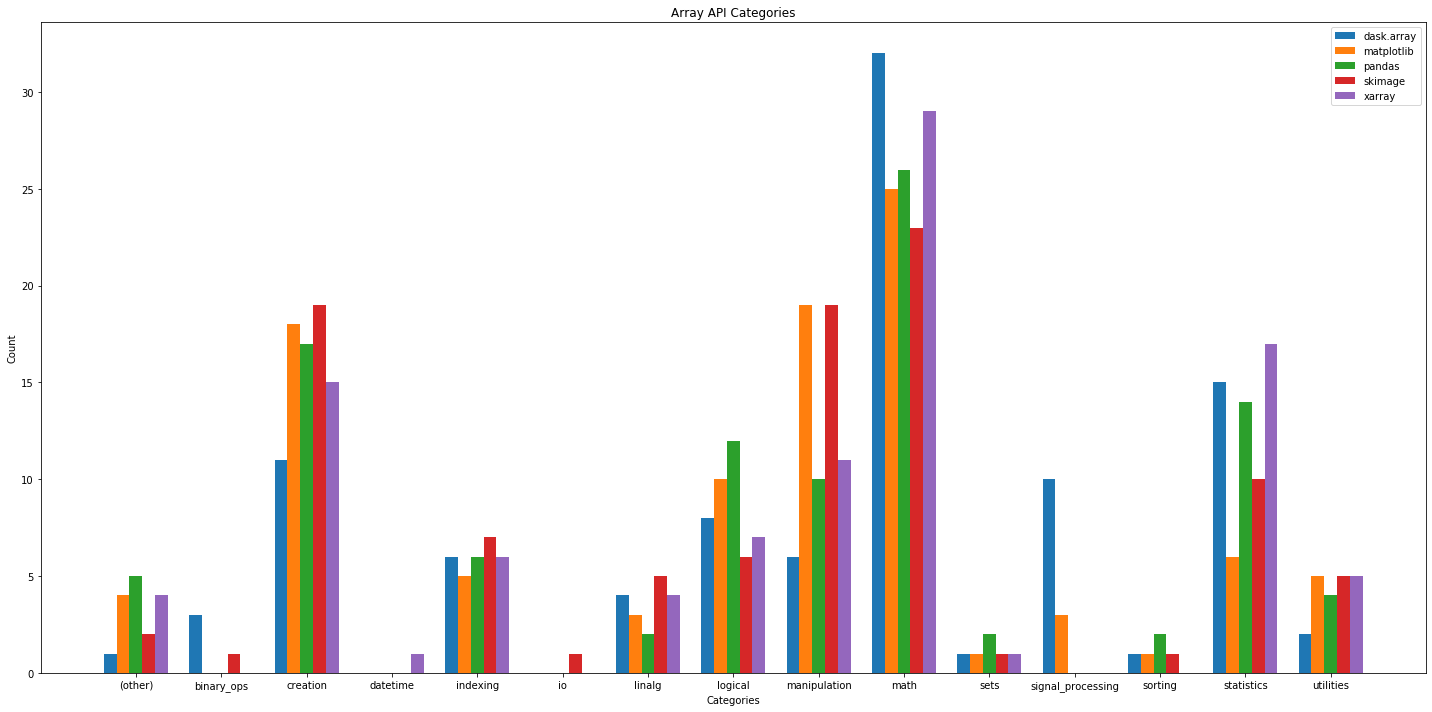

In [56]:
groups = LIB_TOP_100_CATEGORY_STATS.index.values

fig, ax = plt.subplots()
index = np.arange(len(groups))
bar_width = 0.15

rects1 = plt.bar(index-(1*bar_width), LIB_TOP_100_CATEGORY_STATS['dask.array'], bar_width, label='dask.array')
rects2 = plt.bar(index-(0*bar_width), LIB_TOP_100_CATEGORY_STATS['matplotlib'], bar_width, label='matplotlib')
rects3 = plt.bar(index+(1*bar_width), LIB_TOP_100_CATEGORY_STATS['pandas'], bar_width, label='pandas')
rects4 = plt.bar(index+(2*bar_width), LIB_TOP_100_CATEGORY_STATS['skimage'], bar_width, label='skimage')
rects5 = plt.bar(index+(3*bar_width), LIB_TOP_100_CATEGORY_STATS['xarray'], bar_width, label='xarray')

plt.title('Array API Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(index + bar_width, groups)
plt.legend()

plt.tight_layout()
plt.show()

### Summary

As shown in the chart, the top four most common categories for the top `100` NumPy APIs consumed by each downstream library are those for (1) element-wise evaluation of elementary mathematical functions, (2) array creation, (3) array manipulation, and (4) statistical reductions.